In [10]:
import torch
import torch.nn as nn
import numpy as np

# Generate some random data
np.random.seed(0)
X = np.random.rand(100, 1)
y = 3 + 2 * X + np.random.randn(100, 1) / 1.5

# Convert data to PyTorch tensors
X_tensor = torch.from_numpy(X.astype(np.float32))
y_tensor = torch.from_numpy(y.astype(np.float32))


# Define the linear regression model
class LinearRegression(nn.Module):
    def __init__(self):
        super(LinearRegression, self).__init__()
        self.linear = nn.Linear(1, 1)

    def forward(self, x):
        return self.linear(x)


# Initialize the model, loss function, and optimizer
model = LinearRegression()
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

# Train the model
for epoch in range(1000):
    optimizer.zero_grad()
    outputs = model(X_tensor)
    loss = criterion(outputs, y_tensor)
    loss.backward()
    optimizer.step()

    if epoch % 100 == 0:
        print(f"Epoch {epoch+1}, Loss: {loss.item()}")

# Print the learned parameters

m = model.linear.weight.item()
b = model.linear.bias.item()

print("Learned parameters:")
print("Weight:", m)
print("Bias:", b )

Epoch 1, Loss: 17.915300369262695
Epoch 101, Loss: 0.5667617321014404
Epoch 201, Loss: 0.4498440623283386
Epoch 301, Loss: 0.44720563292503357
Epoch 401, Loss: 0.4457608759403229
Epoch 501, Loss: 0.44465988874435425
Epoch 601, Loss: 0.4438181221485138
Epoch 701, Loss: 0.44317448139190674
Epoch 801, Loss: 0.4426823854446411
Epoch 901, Loss: 0.4423060715198517
Learned parameters:
Weight: 1.8526490926742554
Bias: 3.201467752456665


In [8]:
t_tensor = torch.from_numpy(np.linspace(0, 1, 100).astype(np.float32))
with torch.no_grad():
    y_pred = model(t_tensor).numpy()

RuntimeError: mat1 and mat2 shapes cannot be multiplied (1x100 and 1x1)

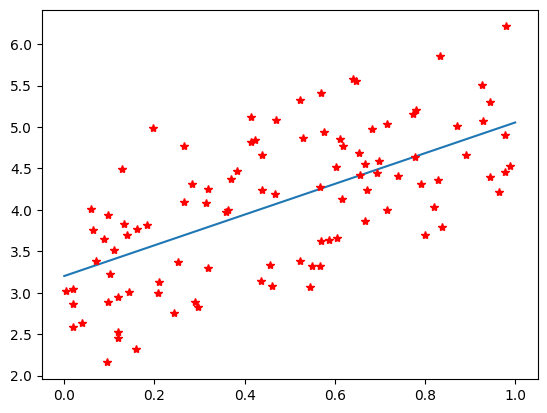

In [12]:
import matplotlib.pyplot as plt

t = np.linspace(0 , 1, 200)
fig001 = plt.figure()
plt.plot(t, m*t+b)
plt.plot(X, y, 'r*')